In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
# Load Data
# Assuming the file path matches the location on your system
file_path = "C:/Users/noman/My Drive/ABP/ABP DSBA Batch 03/Unit 02/Session 03_LogRegContd_Rcode_decision tree/airbnb_data.csv"
airbnbData = pd.read_csv(file_path)

In [3]:
# Filter Data for NYC
airbnbData = airbnbData[airbnbData['city'] == 'NYC']

In [4]:
# Create a Subset for Analysis

# Adjust the column names as per your CSV file's header
columns_to_keep = ["reviews", "overall_satisfaction", "accommodates", "bedrooms", "price"]
airbnbDataSub = airbnbData[columns_to_keep]

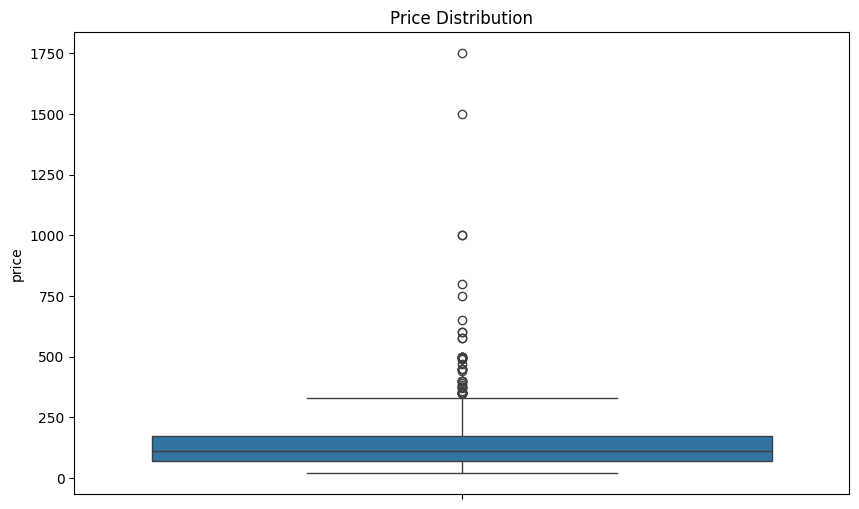

In [5]:
# Exploratory Data Analysis (EDA)

# Price Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=airbnbDataSub)
plt.title('Price Distribution')
plt.show()

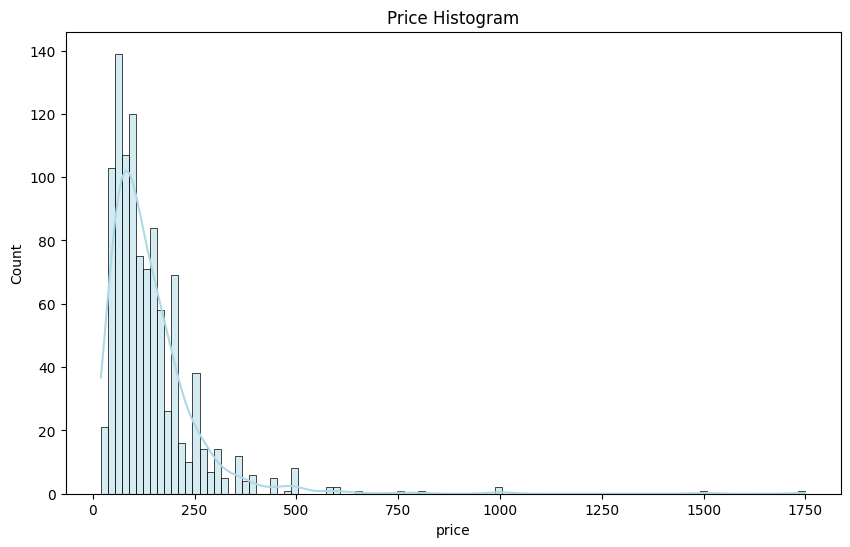

In [6]:
# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(airbnbDataSub['price'], bins=100, kde=True, color='lightblue')
plt.title('Price Histogram')
plt.show()

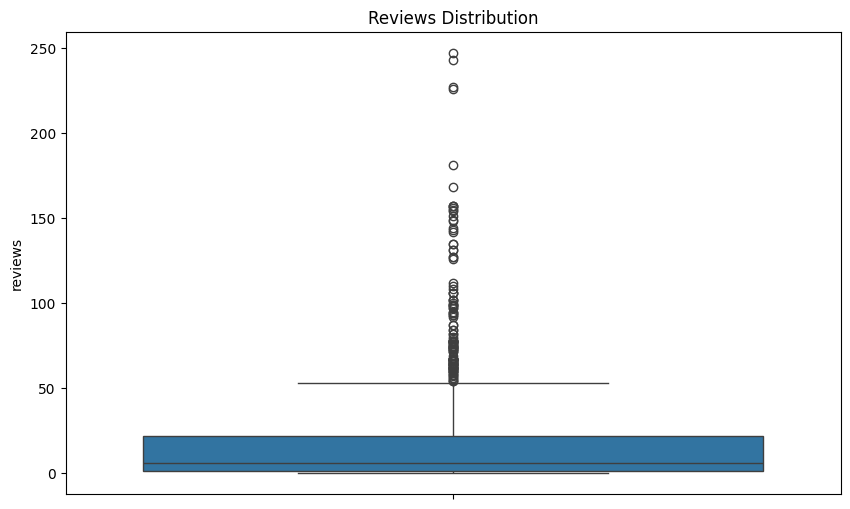

In [7]:
# Reviews Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='reviews', data=airbnbDataSub)
plt.title('Reviews Distribution')
plt.show()


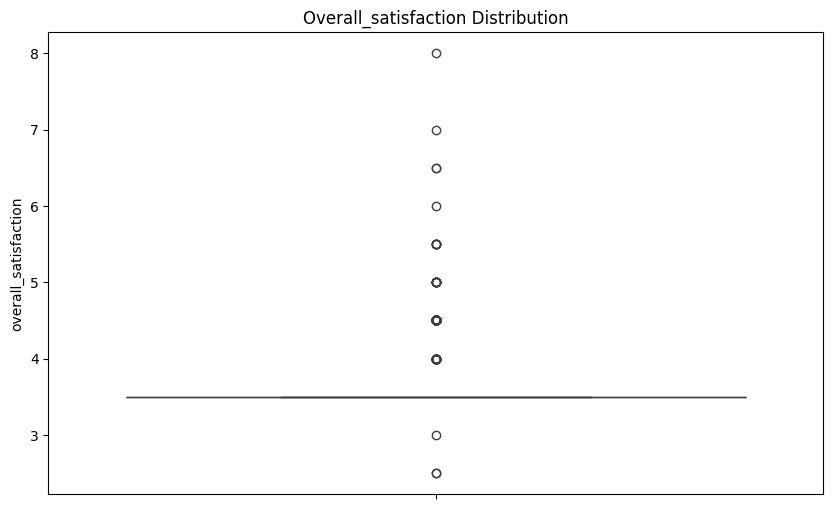

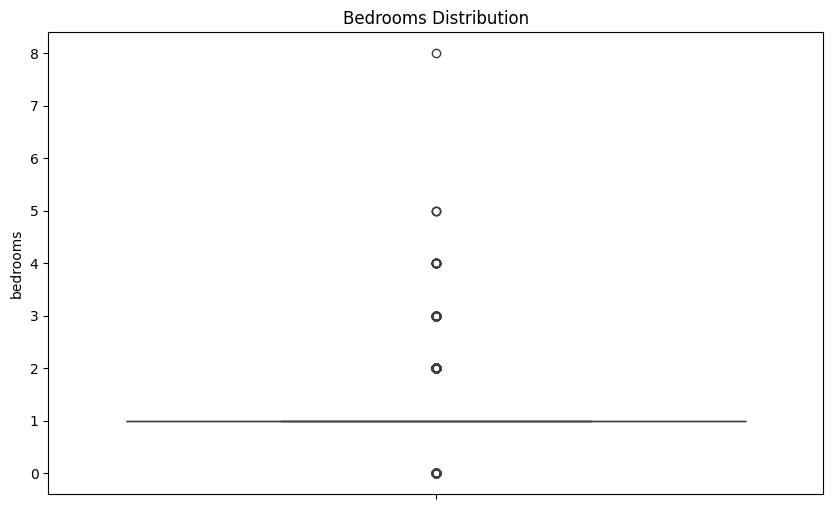

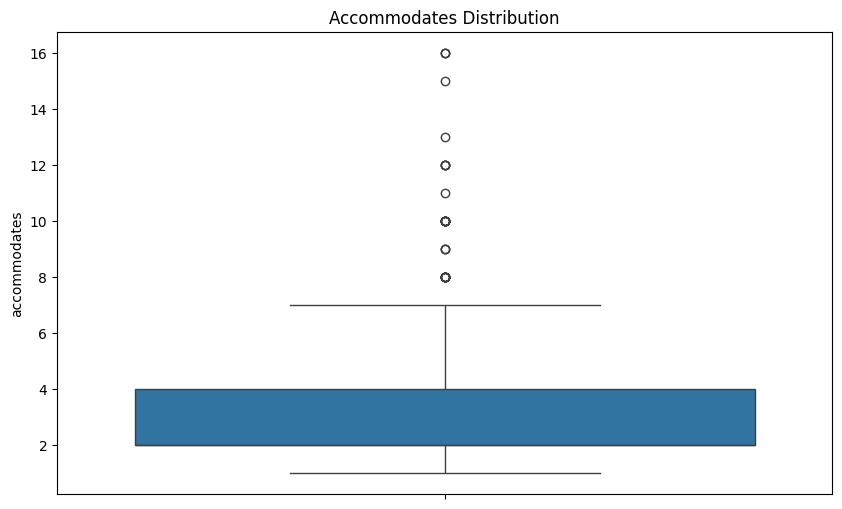

In [8]:
# Other variables' Boxplots
variables_to_plot = ['overall_satisfaction', 'bedrooms', 'accommodates']
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=variable, data=airbnbDataSub)
    plt.title(f'{variable.capitalize()} Distribution')
    plt.show()

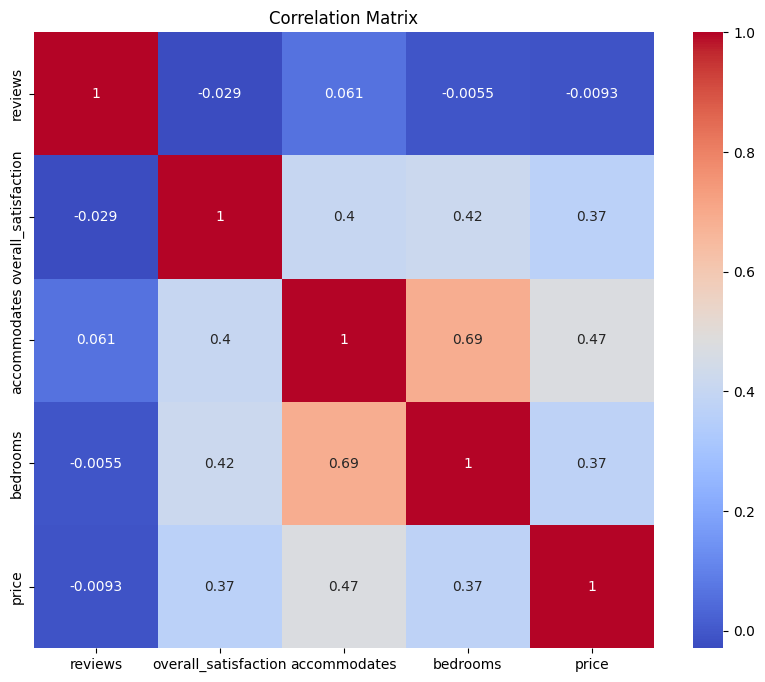

In [9]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 8))
corr = airbnbDataSub.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

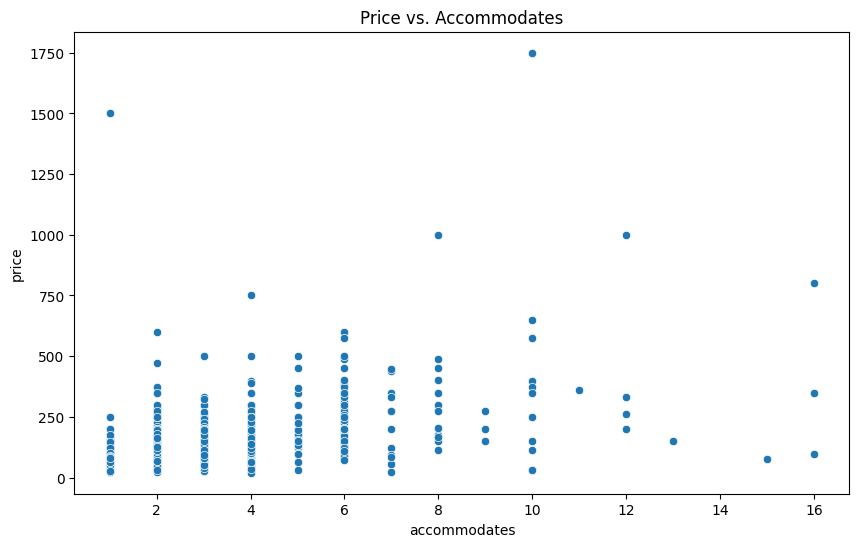

In [10]:
# Scatter plot with accommodates and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='price', data=airbnbDataSub)
plt.title('Price vs. Accommodates')
plt.show()

In [11]:
# Simple Linear Regression
# Fitting a linear regression model
model = ols("price ~ accommodates", data=airbnbDataSub).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     295.9
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.99e-58
Time:                        05:25:49   Log-Likelihood:                -6238.7
No. Observations:                1024   AIC:                         1.248e+04
Df Residuals:                    1022   BIC:                         1.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       53.8304      6.117      8.801   

In [13]:
# Predictions and residuals
# Ensure 'airbnbDataSub' is directly modified without ambiguity
airbnbDataSub.loc[:, 'predicted_price'] = model.fittedvalues
airbnbDataSub.loc[:, 'residuals'] = model.resid


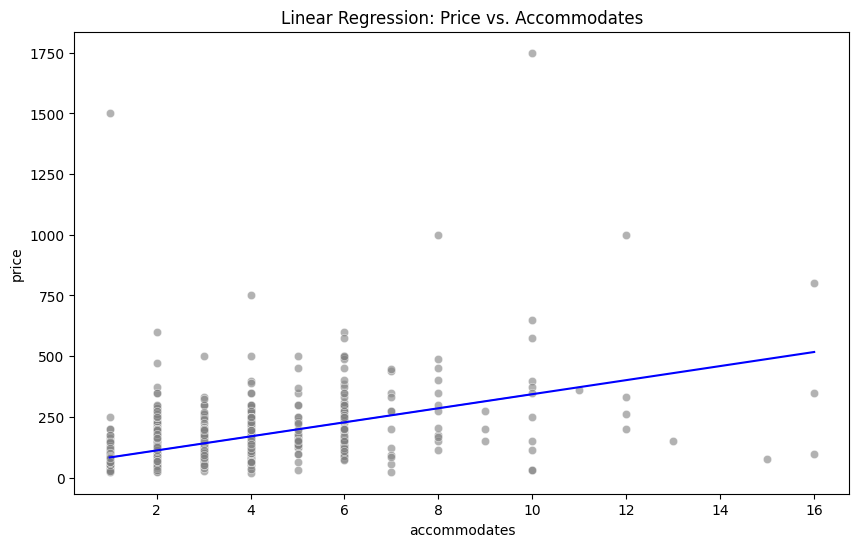

In [14]:
# Plotting regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='price', data=airbnbDataSub, color='gray', alpha=0.6)
sns.lineplot(x='accommodates', y='predicted_price', data=airbnbDataSub, color='blue')
plt.title('Linear Regression: Price vs. Accommodates')
plt.show()

In [15]:
# ANOVA

anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                    sum_sq      df           F        PR(>F)
accommodates  3.398696e+06     1.0  295.850051  1.985800e-58
Residual      1.174063e+07  1022.0         NaN           NaN


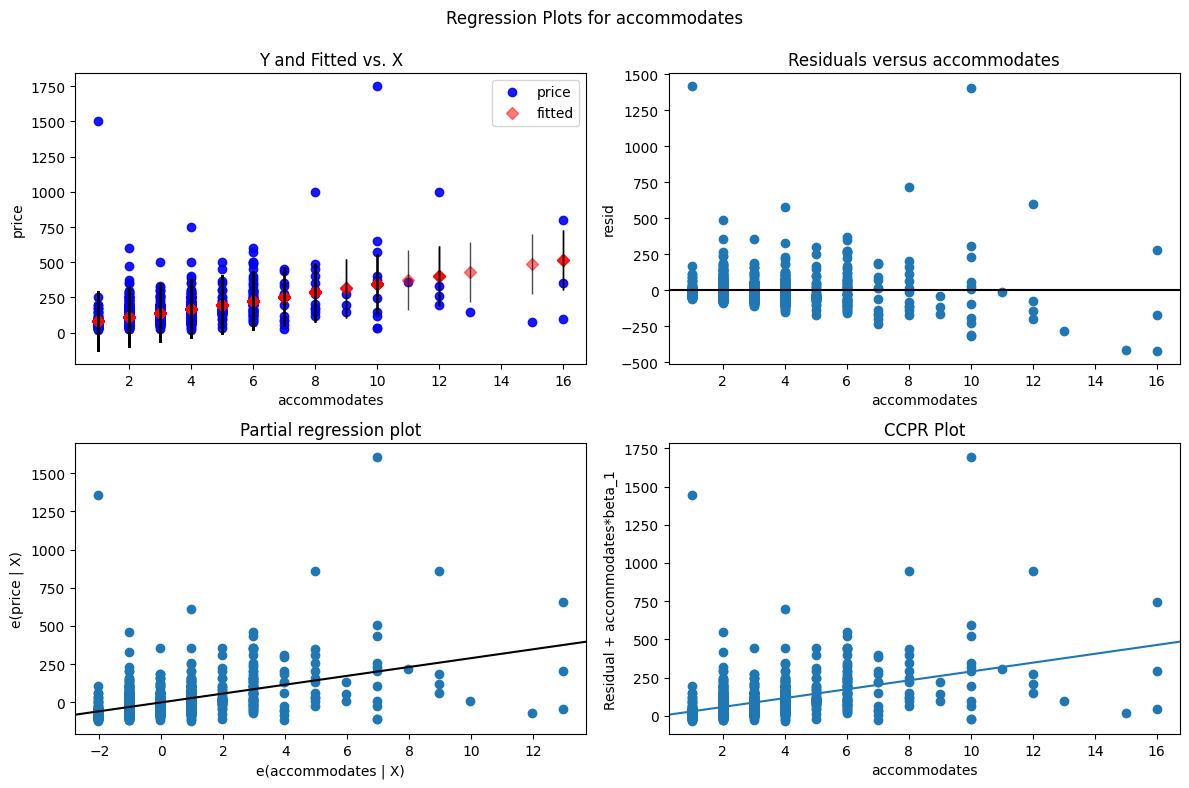

In [16]:
# Diagnostic Plots

#1. Non-linearity of the relationships

# Statsmodels provides a function to create four basic diagnostic plots for linear regression analysis. These plots can help identify potential issues with the model, such as non-linearity, heteroscedasticity, and outliers.

fig = sm.graphics.plot_regress_exog(model, "accommodates", fig=plt.figure(figsize=(12, 8)))
plt.show()

In [17]:
# 2. Correlation of Error Terms

# For the Durbin-Watson test to check the correlation of error terms:

from statsmodels.stats.stattools import durbin_watson

# Assuming `model` is your fitted model from `statsmodels`
dw_test_result = durbin_watson(model.resid)
print("Durbin-Watson Test Result:", dw_test_result)

# The test statistic value ranges from 0 to 4, where:

#    A value of 2 indicates no autocorrelation.
#    Values approaching 0 indicate positive autocorrelation.
#    Values approaching 4 indicate negative autocorrelation.

Durbin-Watson Test Result: 2.127728071598267


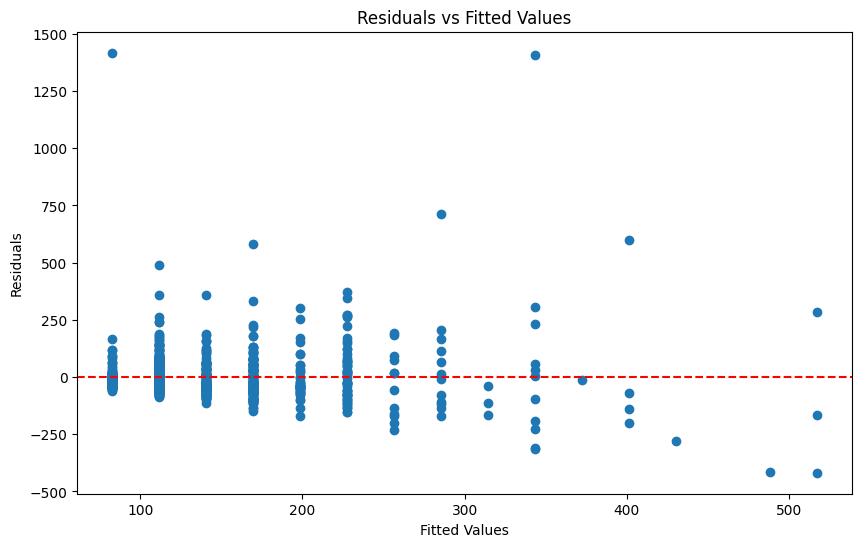

In [18]:
# 3. Non-constant Variance of Error Terms

# For plotting residuals to assess non-constant variance:

import matplotlib.pyplot as plt

residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

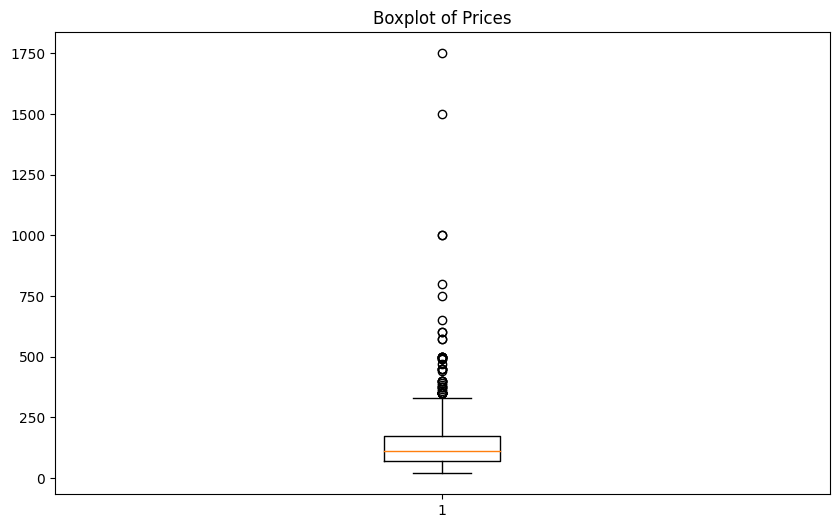

In [19]:
#4. Outliers

# For identifying and potentially removing outliers based on the price:

# Outlier Detection and Removal
plt.figure(figsize=(10, 6))
plt.boxplot(airbnbDataSub['price'])
plt.title('Boxplot of Prices')
plt.show()


In [20]:

# Removing outliers
q_low = airbnbDataSub['price'].quantile(0.01)
q_hi  = airbnbDataSub['price'].quantile(0.99)

airbnbDataSub_filtered = airbnbDataSub[(airbnbDataSub['price'] < q_hi) & (airbnbDataSub['price'] > q_low)]

In [22]:
# Winsorizing

# For Winsorizing the price variable:

from scipy.stats.mstats import winsorize

# Winsorizing
airbnbDataSub.loc[:,'priceWinsorized'] = winsorize(airbnbDataSub['price'], limits=[0.01, 0.01])

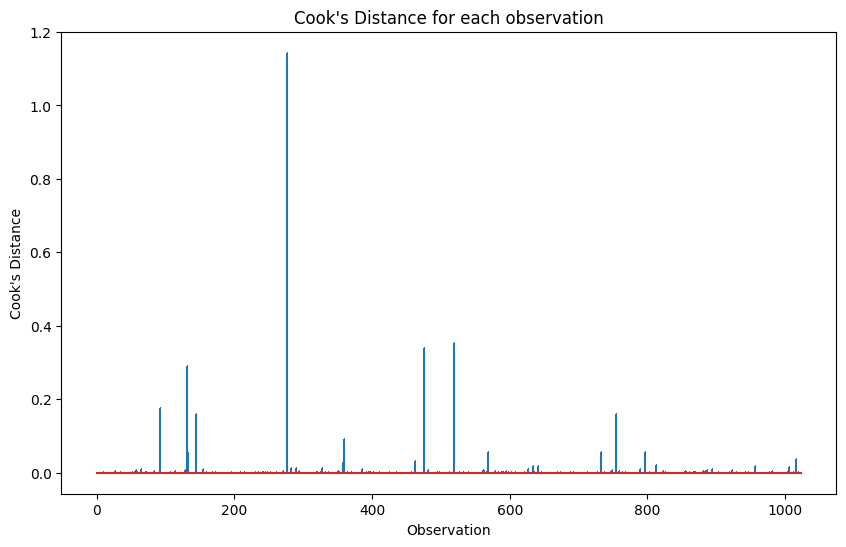

In [23]:
# 5. High-Leverage Points

# For identifying high-leverage points using Cook's distance:

from statsmodels.stats.outliers_influence import OLSInfluence

test_class = OLSInfluence(model)
cooks_d = test_class.cooks_distance[0]

plt.figure(figsize=(10, 6))
plt.stem(cooks_d, markerfmt=",")
plt.title("Cook's Distance for each observation")
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.show()

In [24]:
# Identify and potentially remove high-leverage points:

import numpy as np

high_leverage_points = np.where(cooks_d > 4*np.mean(cooks_d))[0]
print("High leverage points:", high_leverage_points)

# Removing high leverage points
airbnbDataSub_no_high_leverage = airbnbDataSub.drop(airbnbDataSub.index[high_leverage_points])

High leverage points: [  92  132  133  145  277  358  360  463  475  519  569  634  641  732
  754  797  813  956 1006 1016]


In [26]:
# 6. Multi-Collinearity

# For checking multi-collinearity in multiple linear regression, you can use Variance Inflation Factor (VIF):

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming `airbnbDataSub` has been preprocessed to include only relevant predictors
predictors = airbnbDataSub[['accommodates', 'reviews', 'bedrooms', 'overall_satisfaction']]
predictors = sm.add_constant(predictors)  # adding a constant for the intercept

In [27]:
# Checking for Missing or Infinite Values

# Check for missing (NaN) values
print(predictors.isnull().sum())

# Check for infinite values
print(predictors.isin([np.inf, -np.inf]).sum())

# Handling Missing Values

# You have a few options for handling missing values. Here are two common approaches:
# Option 1: Removing Rows with Missing or Infinite Values

# Remove rows with NaN values
predictors = predictors.dropna()

# Remove rows with infinite values
predictors = predictors.replace([np.inf, -np.inf], np.nan).dropna()


const                   0
accommodates            0
reviews                 0
bedrooms                4
overall_satisfaction    0
dtype: int64
const                   0
accommodates            0
reviews                 0
bedrooms                0
overall_satisfaction    0
dtype: int64


In [ ]:

# Option 2: Filling Missing Values with a Statistic

# Fill NaN values with the mean of each column
predictors = predictors.fillna(predictors.mean())

# Optionally, if you have infinite values, you might want to replace them with NaN first and then fill them
predictors = predictors.replace([np.inf, -np.inf], np.nan)
predictors = predictors.fillna(predictors.mean())

In [28]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

print(vif)

   VIF Factor              features
0   87.672451                 const
1    1.981469          accommodates
2    1.010134               reviews
3    2.004933              bedrooms
4    1.254144  overall_satisfaction
